In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
DATADIR = 'dataset/'

# 讀入檔案

In [4]:
dataset = pd.read_csv(DATADIR + 'adult.train.txt',header = None, sep=',')
dataset.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
columns_titles = ['age', 'education-num', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
dataset=dataset.reindex(columns=columns_titles)


testdata = pd.read_csv(DATADIR + 'adult.test.txt',header = 0, sep=',')
testdata.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
testdata=testdata.reindex(columns=columns_titles)
dataset
testdata
# testdata.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

,age,education-num,workclass,education,marital-status,occupation,relationship,race,sex,fnlwgt,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,9,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,89814,0,0,50,United-States,<=50K.
1,28,12,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,336951,0,0,40,United-States,>50K.
2,44,10,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,160323,7688,0,40,United-States,>50K.
3,18,10,?,Some-college,Never-married,?,Own-child,White,Female,103497,0,0,30,United-States,<=50K.
4,34,6,Private,10th,Never-married,Other-service,Not-in-family,White,Male,198693,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,13,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,215419,0,0,36,United-States,<=50K.
16276,64,9,?,HS-grad,Widowed,?,Other-relative,Black,Male,321403,0,0,40,United-States,<=50K.
16277,38,13,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,374983,0,0,50,United-States,<=50K.
16278,44,13,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,83891,5455,0,40,United-States,<=50K.


# 資料前處理

In [5]:
#去除問號值
dataset = dataset[(dataset.astype(str) != ' ?').all(axis=1)]
original_dataset = dataset

In [6]:
#去除掉欲預測之Label以及多餘的資訊
dataset = dataset.drop(['fnlwgt','capital-gain','capital-loss','native-country','income'], axis=1)
dataset = pd.get_dummies(dataset,columns = ['workclass','education','marital-status','occupation','relationship','race','sex'])
dataset

,age,education-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,13,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,9,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,40,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,13,40,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,38,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
32557,40,9,40,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32558,58,9,40,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
32559,22,9,20,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [7]:
y_train = dataset.loc[:,'hours-per-week']
X_train = dataset.drop(['hours-per-week'], axis=1)

In [8]:
from sklearn.model_selection import train_test_split
testdata

,age,education-num,workclass,education,marital-status,occupation,relationship,race,sex,fnlwgt,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,9,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,89814,0,0,50,United-States,<=50K.
1,28,12,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,336951,0,0,40,United-States,>50K.
2,44,10,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,160323,7688,0,40,United-States,>50K.
3,18,10,?,Some-college,Never-married,?,Own-child,White,Female,103497,0,0,30,United-States,<=50K.
4,34,6,Private,10th,Never-married,Other-service,Not-in-family,White,Male,198693,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,13,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,215419,0,0,36,United-States,<=50K.
16276,64,9,?,HS-grad,Widowed,?,Other-relative,Black,Male,321403,0,0,40,United-States,<=50K.
16277,38,13,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,374983,0,0,50,United-States,<=50K.
16278,44,13,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,83891,5455,0,40,United-States,<=50K.


In [9]:
testdata = testdata[(testdata.astype(str) != ' ?').all(axis=1)]
test_dataset = testdata
testdata = testdata.drop(['fnlwgt','capital-gain','capital-loss','native-country','income'], axis=1)
testdata = pd.get_dummies(testdata,columns = ['workclass','education','marital-status','occupation','relationship','race','sex'])
y_test = testdata.loc[:,'hours-per-week']
X_test = testdata.drop(['hours-per-week'], axis=1)

# 預測

## >Random Forest

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

RMSE：10.440535856674751
MAPE：26.201349515173707
RMSE：10.421529002730736
MAPE：26.16269790006524
RMSE：10.413823158350265
MAPE：26.148425068867876
RMSE：10.408249988900172
MAPE：26.135868819907227
RMSE：10.407510457988367
MAPE：26.13180448983849
RMSE：10.406415202747779
MAPE：26.136830373438414
RMSE：10.405654899400409
MAPE：26.14944411452412
RMSE：10.406225166404493
MAPE：26.164602925229918
RMSE：10.404972859555318
MAPE：26.157656979314392
RMSE：10.404280848035626
MAPE：26.162492331455816
RMSE：10.404318708747885
MAPE：26.164796933069894
RMSE：10.405364401902785
MAPE：26.176015925287487
RMSE：10.40612510804113
MAPE：26.181952897698046
RMSE：10.406581175129826
MAPE：26.19147912915583
RMSE：10.407000128705441
MAPE：26.20122189499265
RMSE：10.407836553614503
MAPE：26.210273607428697
RMSE：10.408903811644945
MAPE：26.217142355608857
RMSE：10.409276616042941
MAPE：26.222430126956198
RMSE：10.409813035631435
MAPE：26.228232588366414
19 19


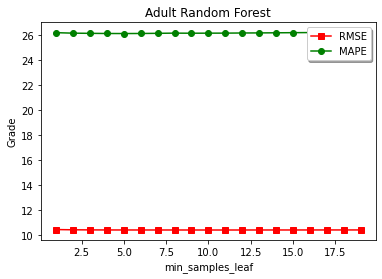

In [43]:
import matplotlib.pyplot as plt
def MAPE(predict,target):
    return ( abs((target - predict) / target).mean()) * 100
def train_and_predict_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('RMSE：' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('MAPE：' + str(MAPE(y_pred, y_test)))
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred)),MAPE(y_pred, y_test)

ran = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
RMSE_list = []
MAPE_list = []
max_MAPE = 0
max_RMSE = 0
depth_MAPE = 0
depth_RMSE = 0
for i in range(1,20):
#     for y in range(1,40):
    model = RandomForestRegressor(max_depth = i, n_estimators = 400, random_state=0)

    A,B = train_and_predict_model(X_train, X_test, y_train, y_test, model)
    if(max_RMSE < A):
        depth_RMSE = i
    if(max_MAPE < B):
        depth_MAPE = i
    RMSE_list.append(A)
    MAPE_list.append(B)

print(depth_MAPE,depth_RMSE)
fig , ax = plt.subplots()
plt.title("Adult Random Forest")
plt.xlabel("min_samples_leaf")
plt.ylabel("Grade")
plt.plot(ran,RMSE_list,'s-',color = 'r',label="RMSE")
plt.plot(ran,MAPE_list,'o-',color = 'g',label="MAPE")
ax.legend(loc='upper right', shadow=True) 

## >Random Forset best grade

In [45]:
model = RandomForestRegressor(max_depth = 10, n_estimators = 400, random_state=0)

A,B = train_and_predict_model(X_train, X_test, y_train, y_test, model)
print(A,B)

RMSE：10.440535856674751
MAPE：26.201349515173707
10.440535856674751 26.201349515173707


## >XGBoost

In [10]:
import xgboost as xg

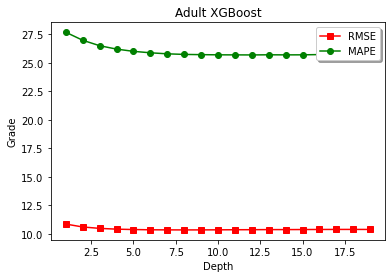

In [14]:
import matplotlib.pyplot as plt
def MAPE(predict,target):
    return ( abs((target - predict) / target).mean()) * 100
def train_and_predict_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
ran = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
RMSE_list = []
MAPE_list = []
for i in range(1,20):
    XGModel = xg.XGBRegressor(objective ='reg:squarederror',gpu_id = 0,learning_rate = 0.01, n_estimators = 500, max_depth = i, min_child_weight = i, gamma = 0.5, subsample = 0.8, colsample_bytree = 0.7, reg_alpha = 3, reg_lambda = 3) 
    XGModel.fit(X_train,y_train)
    y_pred = XGModel.predict(X_test)
    RMSE_list.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    MAPE_list.append(MAPE(y_pred, y_test))
fig , ax = plt.subplots()
plt.title("Adult XGBoost")
plt.xlabel("Depth")
plt.ylabel("Grade")
plt.plot(range(1,20),RMSE_list,'s-',color = 'r',label="RMSE")
plt.plot(range(1,20),MAPE_list,'o-',color = 'g',label="MAPE")
ax.legend(loc='upper right', shadow=True) 

In [15]:
print(MAPE_list.index(min(MAPE_list)))

11


## >XGBoost best grade

In [16]:
XGModel = xg.XGBRegressor(objective ='reg:squarederror',gpu_id = 0,learning_rate = 0.01, n_estimators = 500, max_depth = 9, min_child_weight = 4, gamma = 0.5, subsample = 0.8, colsample_bytree = 0.7, reg_alpha = 3, reg_lambda = 3) 
XGModel.fit(X_train,y_train)
y_pred = XGModel.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),MAPE(y_pred, y_test))

10.339568126746347 25.701050032299204


## >SVR

In [16]:
from sklearn.svm import SVR

kernel:  rbf
RMSE：10.80233111512731
MAPE：25.090387531684254
kernel:  sigmoid
RMSE：12.094208872150675
MAPE：29.631420659690804


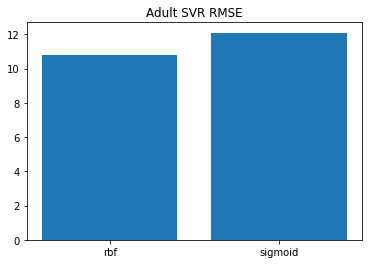

In [18]:
kernel_list = [ 'rbf', 'sigmoid']
rbf = 0
sigmoid = 0
for i in kernel_list:
    svr_poly = SVR(kernel=i, C=3, gamma='auto')

    SVRModel = svr_poly.fit(X_train,y_train)
    y_pred = SVRModel.predict(X_test)

    #long running

    print('kernel: ',i)

    print('RMSE：' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('MAPE：' + str(MAPE(y_pred, y_test)))
    if i == 'rbf':
        rbf = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    else:
        sigmoid = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
plt.title("Adult SVR RMSE")
values = [rbf,sigmoid]
x_labels = ['rbf','sigmoid']
plt.bar(x_labels,values)
plt.show()

## >SVR best grade

In [19]:
print('Training Acc ： {:.3f}'.format(SVRModel.score(X_train,y_train)))
print('Validation Acc ： {:.3f}'.format(SVRModel.score(X_test,y_test)))

Training Acc ： 0.205
Validation Acc ： 0.197


In [20]:
y_pred = SVRModel.predict(X_test)

In [21]:
print('RMSE：' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('MAPE：' + str(MAPE(y_pred, y_test)))

RMSE：10.983547999599917
MAPE：24.718173048177416


In [22]:
SVRModel.predict(testdata) #測試Test data

array([38.87290113])

## >類神經網路

In [10]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [42]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.losses import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

RMSE_list = []
MAPE_list = []
import matplotlib.pyplot as plt
def MAPE(predict,target):
    return ( abs((target - predict) / target).mean()) * 100
def train_and_predict_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
model = Sequential()
model.add(Dense(12, input_dim=59, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss=root_mean_squared_error, optimizer='adam', metrics=[mean_absolute_percentage_error])
for i in range(1,50):
    history = model.fit(X_train, y_train, epochs=1000, batch_size=50,  verbose=1)

Epoch 1/1000
604/604 [==============================] - 1s 1ms/step - loss: 16.4164 - mean_absolute_percentage_error: 40.2774
Epoch 2/1000
604/604 [==============================] - 1s 1ms/step - loss: 11.1013 - mean_absolute_percentage_error: 28.9807
Epoch 3/1000
604/604 [==============================] - 1s 1ms/step - loss: 10.6745 - mean_absolute_percentage_error: 27.8380
Epoch 4/1000
604/604 [==============================] - 1s 1ms/step - loss: 10.4960 - mean_absolute_percentage_error: 27.3358
Epoch 5/1000
604/604 [==============================] - 1s 1ms/step - loss: 10.4474 - mean_absolute_percentage_error: 27.1251
Epoch 6/1000
604/604 [==============================] - 1s 1ms/step - loss: 10.4071 - mean_absolute_percentage_error: 26.9436
Epoch 7/1000
604/604 [==============================] - 1s 1ms/step - loss: 10.3771 - mean_absolute_percentage_error: 26.8312
Epoch 8/1000
604/604 [==============================] - 1s 1ms/step - loss: 10.3572 - mean_absolute_percentage_error: 

604/604 [==============================] - 1s 1ms/step - loss: 10.1632 - mean_absolute_percentage_error: 25.6063
Epoch 130/1000
604/604 [==============================] - 1s 1ms/step - loss: 10.1779 - mean_absolute_percentage_error: 25.6187
Epoch 131/1000
604/604 [==============================] - 1s 1ms/step - loss: 10.1552 - mean_absolute_percentage_error: 25.5453
Epoch 132/1000
604/604 [==============================] - 1s 1ms/step - loss: 10.1550 - mean_absolute_percentage_error: 25.6333
Epoch 133/1000
604/604 [==============================] - 1s 1ms/step - loss: 10.1618 - mean_absolute_percentage_error: 25.5893
Epoch 134/1000
604/604 [==============================] - 1s 1ms/step - loss: 10.1789 - mean_absolute_percentage_error: 25.5881
Epoch 135/1000
604/604 [==============================] - 1s 1ms/step - loss: 10.1676 - mean_absolute_percentage_error: 25.5697
Epoch 136/1000
604/604 [==============================] - 1s 1ms/step - loss: 10.1662 - mean_absolute_percentage_error:

KeyboardInterrupt: 

RMSE : 10.04675579071045
MAPE : 25.21539306640625
4529


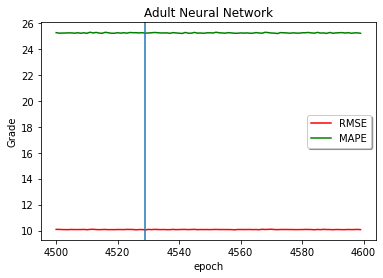

In [36]:
    print('RMSE : ' + str(min(history.history['loss'])))
    print('MAPE : ' + str(history.history['mean_absolute_percentage_error'][history.history['loss'].index(min(history.history['loss']))]))
    RMSE_list.append(min(history.history['loss']))
    MAPE_list.append(history.history['mean_absolute_percentage_error'][history.history['loss'].index(min(history.history['loss']))])
fig , ax = plt.subplots()
plt.title("Adult Neural Network")
plt.xlabel("epoch")
plt.ylabel("Grade")
plt.plot(range(1,50),RMSE_list,color = 'r',label="RMSE")
plt.plot(range(1,50),MAPE_list,color = 'g',label="MAPE")
plt.axvline(history.history['loss'].index(min(history.history['loss'])), 0, 140)

print(history.history['loss'].index(min(history.history['loss'])))

ax.legend(loc='right', shadow=True) 

## >Neural Network best grade

In [52]:
print('RMSE : ' + str(min(history.history['loss'])))
print('MAPE : ' + str(history.history['mean_absolute_percentage_error'][history.history['loss'].index(min(history.history['loss']))]))


RMSE : 10.04675579071045
MAPE : 25.21539306640625
